## Task 1

### (a)   Cluster centroids

In [1]:
import numpy as np

In [2]:
# Form the array from the given data points
arr = np.array([
    [1.2, 0.8],
    [-0.6, -1.3],
    [-0.8, 0.2],
    [0.2, 0.3]
])

In [3]:
# Obtain the centroids of arrays 0 and 2 and arrays 1 and 3
centroid_1 = np.mean(arr[[0,2]], axis=0)
centroid_2 = np.mean(arr[[1,3]], axis=0)

In [4]:
# Evaluate the new centroids until the centroid for each cluster does not change
while True:
    distance_to_centroid_1 = np.linalg.norm(arr - centroid_1, axis=1)
    distance_to_centroid_2 = np.linalg.norm(arr - centroid_2, axis=1)
    labels = np.where(distance_to_centroid_1 < distance_to_centroid_2, 0, 1)
    new_centroid_1 = np.mean(arr[labels == 0], axis=0)
    new_centroid_2 = np.mean(arr[labels == 1], axis=0)
    if np.array_equal(centroid_1, new_centroid_1) and np.array_equal(centroid_2, new_centroid_2):
        break;
    centroid_1 = new_centroid_1
    centroid_2 = new_centroid_2

In [5]:
print(centroid_1, centroid_2)

[0.7  0.55] [-0.7  -0.55]


### (b)   Silhouette Coefficients

In [6]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
# Obtain the average silhouette score of the clustering
silhouette_avg = silhouette_score(arr, labels)

In [9]:
# Obtain the silhouette scores for each data point
silhouette_samples_values = silhouette_samples(arr, labels)

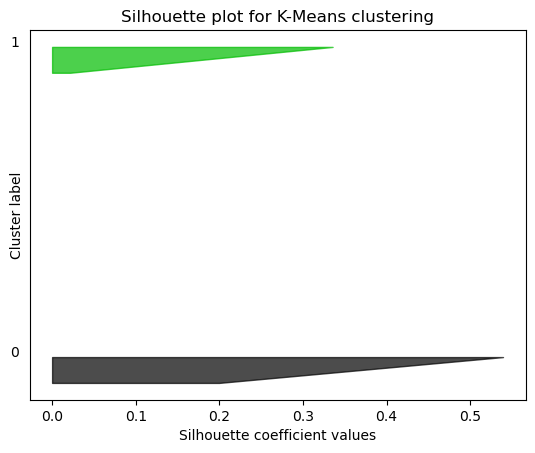

In [43]:
# Plot the silhouette coefficients
fig, ax = plt.subplots()
y_lower = 10
for i in range(2):
    ith_cluster_silhouette_values = silhouette_samples_values[labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 2)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax.set_yticks([])
plt.title("Silhouette plot for K-Means clustering")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.show()

(c) Silhouettes are used to determine if the data points are in the right clusters. Its value ranges from -1 to 1, where 1 implies that the data point is correctly assigned to the right cluster and -1 implies that the data point may not be correctly assigned to the right cluster. Silhouette coefficients are used to measure how close a data point is to its own cluster compared to other clusters.

## Task 2

### (a) Hierarchical clustering

In [12]:
import pandas as pd
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform

In [25]:
# Convert the dataset to dataframe
distance_matrix = pd.read_csv('distancematrix.csv', sep=';', index_col=0)

In [26]:
# Convert the dataframe to a numpy array
distancematrixarr = distance_matrix.to_numpy()

In [27]:
# Obtain the lower triangular part of the array
lower_triangular = distancematrixarr[np.tril_indices(4, -1)]

In [32]:
# Convert the 1d lower triangular array to a square array
square_lower_triangular = squareform(lower_triangular)

In [33]:
# Condense the square array
condensed_matrix = pdist(square_lower_triangular)

In [34]:
# Convert the condensed form to a square array
reconstructed_matrix = squareform(condensed_matrix)

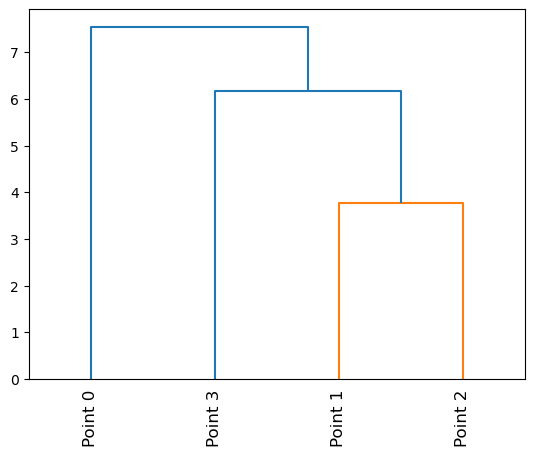

In [36]:
# Plot the dendrogram
import warnings
warnings.filterwarnings('ignore')
dendrogram = sch.dendrogram(
    sch.linkage(condensed_lower_triangular, method='average'),
    labels=[f'Point {i}' for i in range(condensed_lower_triangular.shape[0])], leaf_rotation=90
)

(b)   Partitional clustering involves predefining k-number of clusters which is used into segment objects to different clusters. Hierarchical clustering provides a tree-like structure of clusters which form a dendrogram.

(c) In hard clustering, data points are assigned to exactly one cluster. An example is the K-Means algorithm which assigns data points to the clusters of the nearest centroid. In soft clustering, data points can be assigned to multiple clusters. An example is the Fuzzy C-Means (FCM). Soft clustering is however slower than hard clustering and can be more computationally extensive.

(d) Density-based clustering identifies clusters based on densities of local data points. The clusters consist of core point which is a minimum number of data points within a certain radius and border points. If data points are not within the core points, they could be on the border, hence, they are border points. Its advantages include discovering clusters of arbitrary shape and not needing an initial number of clusters. However, it does not work well with high dimensional datasets. It also struggles with clusters that have similar density.